# Моделирование сходимости по вероятности эмпирической функции распределения к теоретической функции распределения

In [2]:
from typing import NoReturn
from typing import Callable
import random

In [3]:
def check_convergence_by_probability(
        random_variable: Callable,
        distribution_func: Callable,
        eps: float,
        delta: float,
        x: float
) -> NoReturn:
    sample = []
    x_i = random_variable(random.uniform(0.0, 1.0))
    sample.append(x_i)

    n = 1
    probability_estimation = distribution_func(x) * (1 - distribution_func(x)) / (n * eps * eps)
    while abs(probability_estimation) >= delta:
        x_i = random_variable(random.uniform(0.0, 1.0))
        sample.append(x_i)
        n += 1
        probability_estimation = distribution_func(x) * (1 - distribution_func(x)) / (n * eps * eps)

    print(f'Empirical distribution function converged in probability to the theoretical when n is more {n}')

## Пример с непрерывным равномерным распределением

In [4]:
a = 2
b = 5
random_var = lambda x: (b - a) * x + a
distribution_func = lambda x: (x - a) / (b - a)
x = 4.4
eps = 0.2
delta = 0.1
check_convergence_by_probability(random_var, distribution_func, eps, delta, x)

Empirical distribution function converged in probability to the theoretical when n is more 40


# Объяснение решения

Рассмотрим $\xi = F_n(x)$ как случайную величину от $X_1, X_2, ..., X_n$
ее мат. ожидание $E\xi = F(x)$, а дисперсия $D\xi = \dfrac{F(x)(1 - F(x))}{n}$

Тогда используя неравенство Чебышёва — Бьенеме получится следующая оценка
$\forall \varepsilon > 0: $
$$P(|F_n(x) - F(x)| \geqslant \varepsilon) \leqslant \dfrac{F(x)(1 - F(x))}{n \varepsilon^2}$$

при $n \rightarrow \infty$ оценка вероятнсоти стремится к нуля

# Сравнение графиков функций распределения

In [26]:
import matplotlib.pyplot as plt
import numpy as np

In [70]:
def draw_comparison(x, y, x_gen, y_gen, figure_size=(15, 10)):
    plt.figure(figsize=(15,10))

    plt.plot(x, y, color='r', label='Теоретическая ф-р')
    plt.plot(x_gen, y_gen, color='b', label='Эмпирическая ф-р')

    plt.xlabel("x")
    plt.ylabel("P")
    plt.title("Сравнение теоретической и эмпирической функций распределения")

    plt.legend()
    plt.show()

In [71]:
def generate(a, b, N, seed=42):
    rng = np.random.default_rng(seed=seed)
    generated_x = rng.random(N) * (b - a) + a

    step = (b - a) / N
    x = a
    gen_x = [-5]
    gen_F = [0]
    while x < b:
        gen_x.append(x)

        rate = len(np.where(generated_x < x)[0])
        gen_F.append(rate / N)
        x += step

    gen_x.append(10)
    gen_F.append(1)

    x_true = [-4, 2, 5, 10]
    y_true = [0, 0, 1, 1]

    return x_true, y_true, gen_x, gen_F

## Пример для непрерывного равномерного распределения

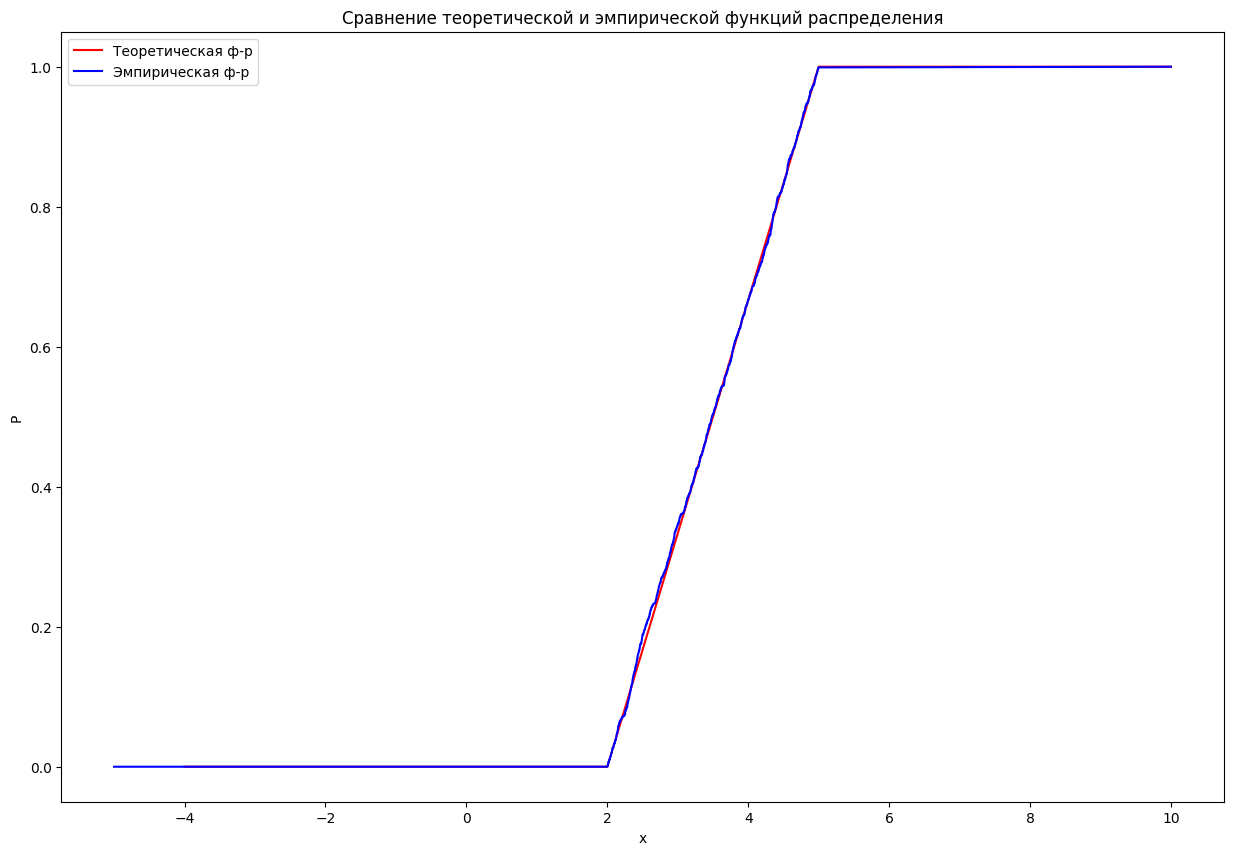

In [76]:
a = 2
b = 5
seed = 42
N = 1000
x_true, y_true, gen_x, gen_F = generate(a, b, N) # сгенерировать выборки
draw_comparison(x_true, y_true, gen_x, gen_F) #

Вывод: по графикам видно, что при росте n эмпирическая функция распределения становится больше похожа на теоретическую функцию распределения.